In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Vishwas\Desktop\Projects\time_series_forecasting\time_series_forecasting\data\PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

### Outlier identification

In [3]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


<Axes: ylabel='Frequency'>

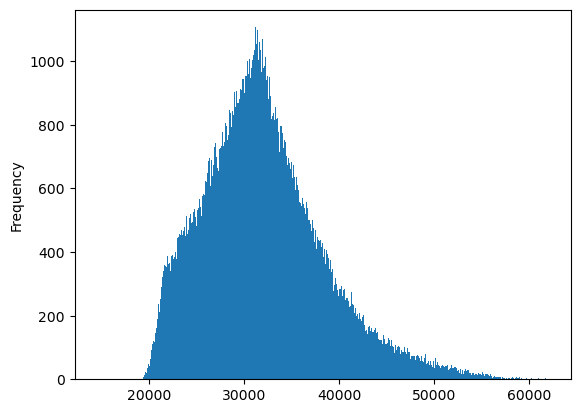

In [4]:
df["PJME_MW"].plot(kind="hist", bins=500)

In [5]:
df.query('PJME_MW < 20000')

,PJME_MW
Datetime,
2002-10-13 04:00:00,19854.0
2002-10-13 05:00:00,19702.0
2002-10-13 06:00:00,19936.0
2002-09-29 05:00:00,19950.0
2002-06-09 06:00:00,19954.0
...,...
2017-04-15 04:00:00,19820.0
2017-04-15 05:00:00,19994.0
2018-05-06 05:00:00,19937.0


<Axes: xlabel='Datetime'>

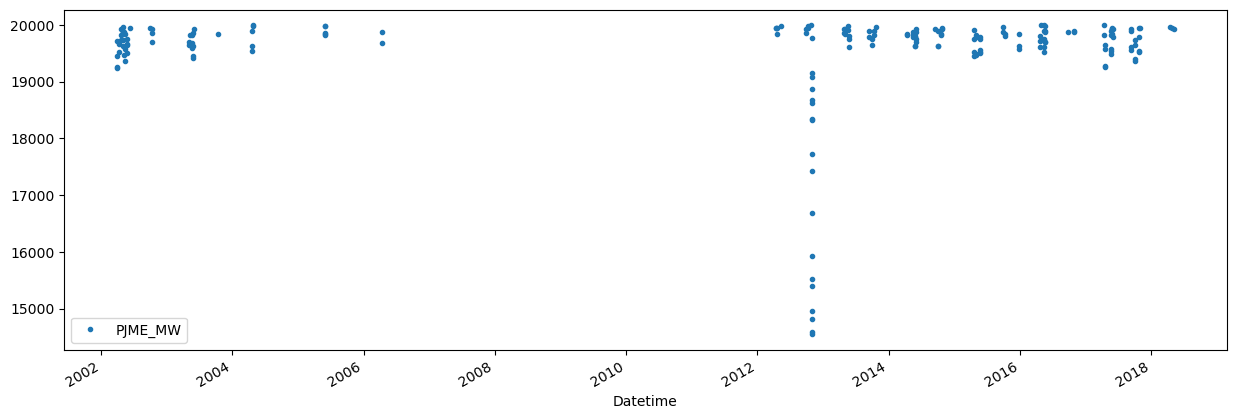

In [6]:
df.query('PJME_MW < 20000').plot(figsize=(15,5), style=".")

<Axes: xlabel='Datetime'>

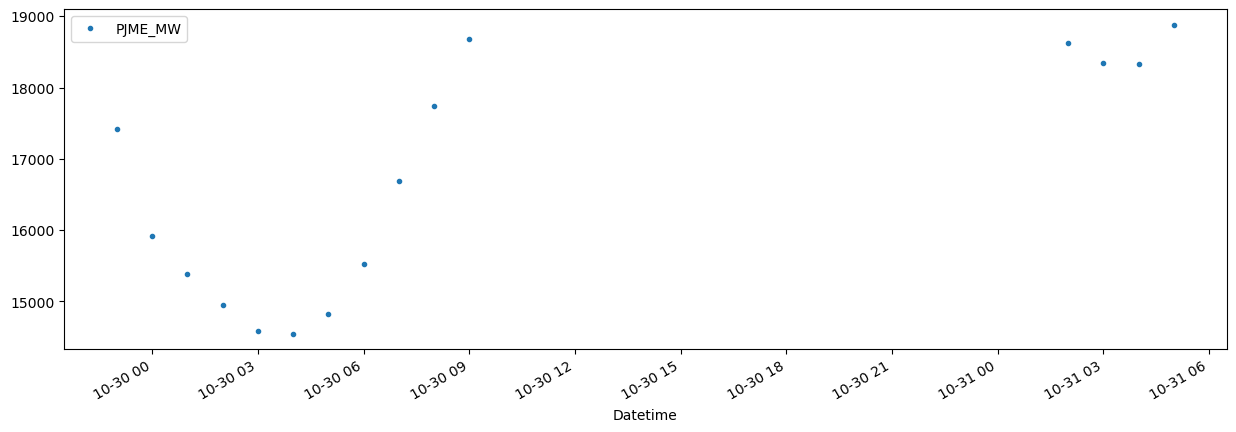

In [7]:
df.query('PJME_MW < 19000').plot(figsize=(15,5), style=".")

In [8]:
df = df.query('PJME_MW > 19000').copy()  # make a copy of df and select only PJME_MW where its greater than 19000, outlier removal

In [9]:
df # outlier removed

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


### Time series Cross Validation

In [10]:
from sklearn.model_selection import TimeSeriesSplit

# test_size is 1 year of data that is 24 hours * 326 days *1
# gap is time gap(in hours) between train set and test set
# this is similar to k fold validation except that its in time series 

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index() # since we need the df to be sorted to get correct time series data 

In [11]:
df

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


[     0      1      2 ... 101524 101525 101526] [101551 101552 101553 ... 110308 110309 110310]
[     0      1      2 ... 110284 110285 110286] [110311 110312 110313 ... 119068 119069 119070]
[     0      1      2 ... 119044 119045 119046] [119071 119072 119073 ... 127828 127829 127830]
[     0      1      2 ... 127804 127805 127806] [127831 127832 127833 ... 136588 136589 136590]
[     0      1      2 ... 136564 136565 136566] [136591 136592 136593 ... 145348 145349 145350]


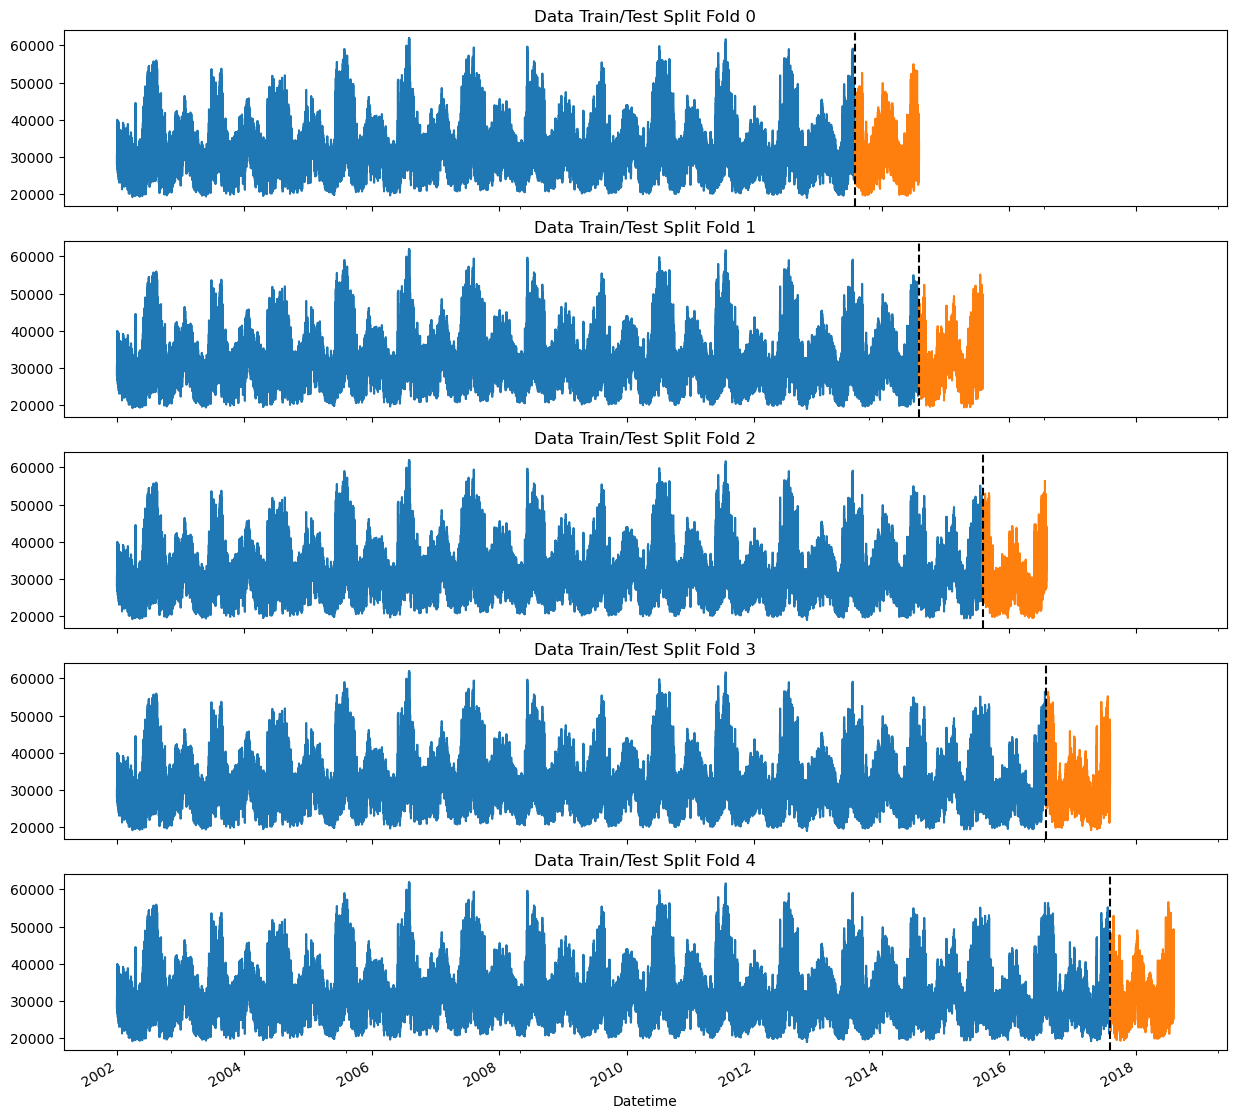

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):  # 5 splits
    print(train_idx, val_idx)
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PJME_MW'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()